In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [9]:
#Read in the data
df = pd.read_csv(r"C:\Users\Peter Villarreal\Desktop\Data Analytics\Datasets\Grey Wolf\Boutin Alberta Grey Wolf.csv")
#Lets look at the data
df.head()

C:\Users\Peter Villarreal\AppData\Local\Temp\ipykernel_16448\987963227.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Peter Villarreal\Desktop\Data Analytics\Datasets\Grey Wolf\Boutin Alberta Grey Wolf.csv")


,event-id,visible,timestamp,location-long,location-lat,external-temperature,gps:dop,height-raw,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,9710294924,True,2013-12-19 00:00:44.000,-111.990073,57.212889,-22.0,2.6,350.59,gps,Canis lupus,13791,13791,Boutin Alberta Grey Wolf
1,9710294925,True,2013-12-19 12:00:45.000,-112.043078,57.211016,-8.0,1.6,335.05,gps,Canis lupus,13791,13791,Boutin Alberta Grey Wolf
2,9710294926,True,2013-12-20 00:00:44.000,-112.105655,57.260090,-5.0,1.8,409.08,gps,Canis lupus,13791,13791,Boutin Alberta Grey Wolf
3,9710294927,True,2013-12-20 12:00:44.000,-112.105336,57.261037,-12.0,1.6,414.98,gps,Canis lupus,13791,13791,Boutin Alberta Grey Wolf
4,9710294928,True,2013-12-21 00:00:44.000,-112.105630,57.260091,-9.0,1.8,416.13,gps,Canis lupus,13791,13791,Boutin Alberta Grey Wolf


In [10]:
# Selecting locations and wolves
wolves_and_locations = df[["location-long", "location-lat", "individual-local-identifier"]]
wolves_and_locations.head()

,location-long,location-lat,individual-local-identifier
0,-111.990073,57.212889,13791
1,-112.043078,57.211016,13791
2,-112.105655,57.260090,13791
3,-112.105336,57.261037,13791
4,-112.105630,57.260091,13791


In [11]:
# Making a pivot table of individual wolves and their respective geographical locations
individual_wolves_piv = wolves_and_locations.pivot_table(values=["location-long", "location-lat"],
                                                         index="individual-local-identifier")
individual_wolves_piv.head()

# This table only represents one location at a specific time per wolf (need to aggregate all locations for each wolf, say for example look at all location points for wolf #13791)

,location-lat,location-long
individual-local-identifier,,
32251,57.382014,-111.523998
32252,57.124155,-112.202173
32253,56.630819,-111.541040
32254,57.600856,-111.582330
32255,56.602792,-112.042742


In [12]:
# Filtering for wolf #13791
wolf_13791 = df[df["individual-local-identifier"] == "13791"]
wolf_13791.head()

# Now that I have a wolf isolated I will create a pivot table with his/her locations

,event-id,visible,timestamp,location-long,location-lat,external-temperature,gps:dop,height-raw,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,9710294924,True,2013-12-19 00:00:44.000,-111.990073,57.212889,-22.0,2.6,350.59,gps,Canis lupus,13791,13791,Boutin Alberta Grey Wolf
1,9710294925,True,2013-12-19 12:00:45.000,-112.043078,57.211016,-8.0,1.6,335.05,gps,Canis lupus,13791,13791,Boutin Alberta Grey Wolf
2,9710294926,True,2013-12-20 00:00:44.000,-112.105655,57.260090,-5.0,1.8,409.08,gps,Canis lupus,13791,13791,Boutin Alberta Grey Wolf
3,9710294927,True,2013-12-20 12:00:44.000,-112.105336,57.261037,-12.0,1.6,414.98,gps,Canis lupus,13791,13791,Boutin Alberta Grey Wolf
4,9710294928,True,2013-12-21 00:00:44.000,-112.105630,57.260091,-9.0,1.8,416.13,gps,Canis lupus,13791,13791,Boutin Alberta Grey Wolf


In [13]:
# Table with locations of wolf #13791
wolf_13791_locations = wolf_13791[["individual-local-identifier", "location-long", "location-lat"]]
wolf_13791_locations.head()

,individual-local-identifier,location-long,location-lat
0,13791,-111.990073,57.212889
1,13791,-112.043078,57.211016
2,13791,-112.105655,57.260090
3,13791,-112.105336,57.261037
4,13791,-112.105630,57.260091


In [3]:
# Using GeoPandas to import a world map dataset
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

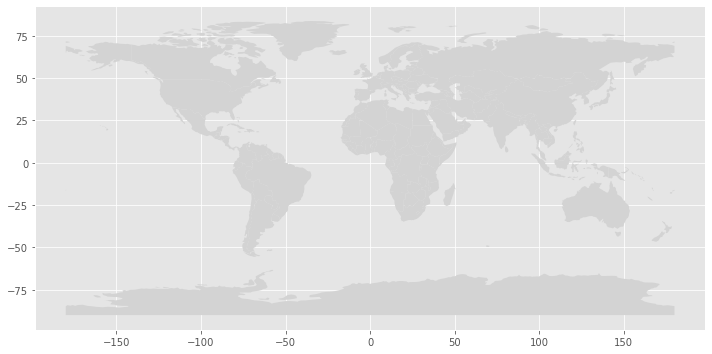

In [4]:
# Now I use GeoPandas to plot the polygons 
countries.plot(color="lightgrey")

<AxesSubplot:>

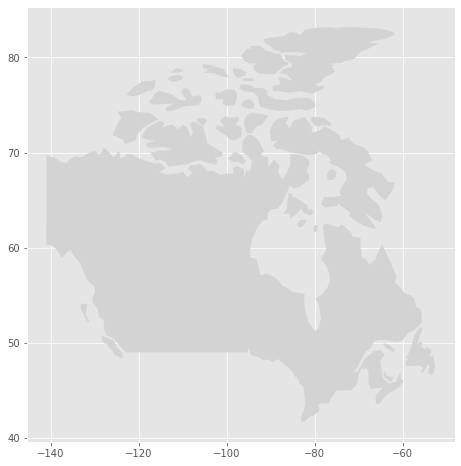

In [5]:
# Since the wolf data came from Alberta, I will filter the world map to display only Canada
countries[countries["name"] == "Canada"].plot(color="lightgrey")

<AxesSubplot:title={'center':'Wolf 13791 Locations'}, xlabel='location-long', ylabel='location-lat'>

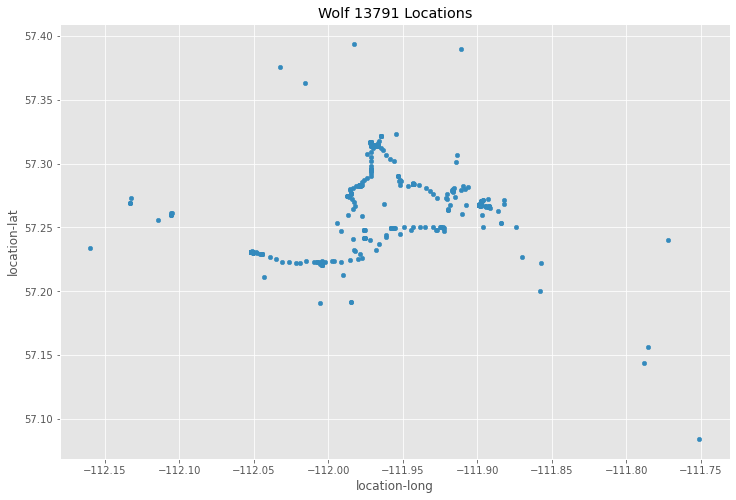

In [14]:
# plot points
wolf_13791_locations.plot(x="location-long", y="location-lat", kind="scatter", 
        title=f"Wolf 13791 Locations")

C:\Users\Peter Villarreal\AppData\Local\Temp\ipykernel_16448\1882368926.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


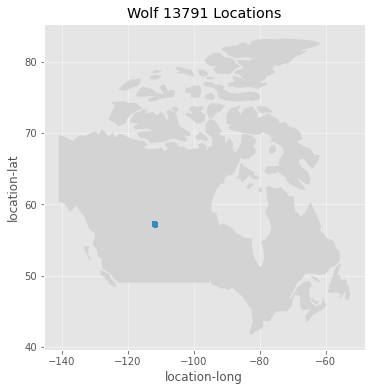

In [17]:
# Putting the entire graph together

# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Canada"].plot(color="lightgrey", ax=ax) 
# plot points
wolf_13791_locations.plot(x="location-long", y="location-lat", kind="scatter", 
        title=f"Wolf 13791 Locations", ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()